Link https://carpentries-incubator.github.io/SDC-BIDS-fMRI/03-basic_image_manipulation/index.html

In [2]:
import os
import numpy
import matplotlib.pyplot as plt
from nilearn import image as img
from nilearn import plotting as plot
from bids import BIDSLayout

#for inline visualization in jupyter notebook
%matplotlib inline 

/home/share/git/scwg2018_python_neuroimaging/scwg2018_nilearn/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [3]:
fmriprep_dir = '../data/ds000030/derivatives/fmriprep/'
layout= BIDSLayout(fmriprep_dir, validate=False)
T1w_files = layout.get(subject='10788', datatype='anat', suffix='preproc')
brainmask_files = layout.get(subject='10788', datatype='anat', suffix='brainmask')

/home/share/git/scwg2018_python_neuroimaging/scwg2018_nilearn/lib/python3.8/site-packages/bids/layout/models.py:148: FutureWarning: The 'extension' entity currently excludes the leading dot ('.'). As of version 0.14.0, it will include the leading dot. To suppress this warning and include the leading dot, use `bids.config.set_option('extension_initial_dot', True)`.
  warnings.warn("The 'extension' entity currently excludes the leading dot ('.'). "


In [4]:
for f in T1w_files:
    print(f.path)

/home/share/git/scwg2018_python_neuroimaging/data/ds000030/derivatives/fmriprep/sub-10788/anat/sub-10788_T1w_preproc.nii.gz
/home/share/git/scwg2018_python_neuroimaging/data/ds000030/derivatives/fmriprep/sub-10788/anat/sub-10788_T1w_space-MNI152NLin2009cAsym_preproc.nii.gz


In [21]:
t1 = T1w_files[0].path
bm = brainmask_files[0].path

t1_img = img.load_img(t1)
bm_img = img.load_img(bm)

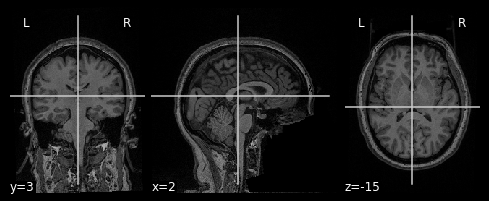

In [22]:
plot.plot_anat(t1_img)

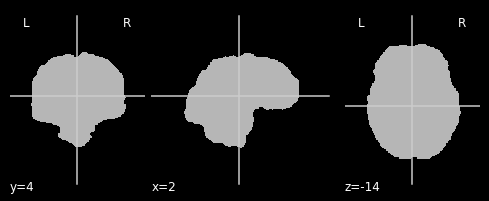

In [7]:
plot.plot_anat(bm_img)

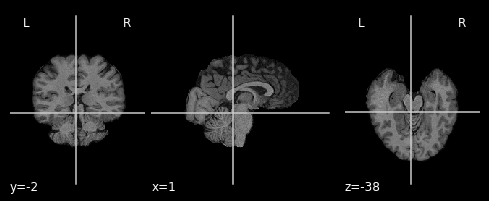

In [8]:
masked_t1 = img.math_img('a*b', a=t1, b=bm)
plot.plot_anat(masked_t1)

# Exercise 1
Try applying the mask such that the brain is removed, but the rest of the head is intact!

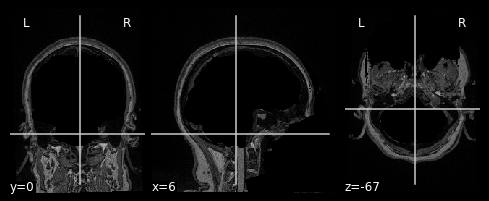

In [17]:
negmasked_t1 = img.math_img('(1-b)*a', a=t1, b=bm)
plot.plot_anat(negmasked_t1)

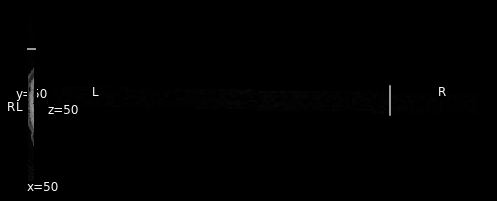

In [46]:
x_slice = t1_img.slicer[:,50:60,:]
plot.plot_anat(x_slice,cut_coords=(50,50,50))

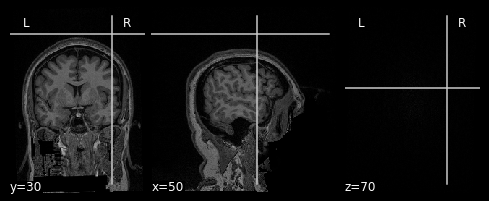

In [24]:
plot.plot_anat(t1_img,cut_coords=(50,30,70))